In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cChurn_Modelling.csv')

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.drop(['RowNumber','CustomerId','Surname'], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
data.duplicated().sum()

0

In [10]:
data.rename(columns={'Exited':'Churn'}, inplace=True)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [12]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


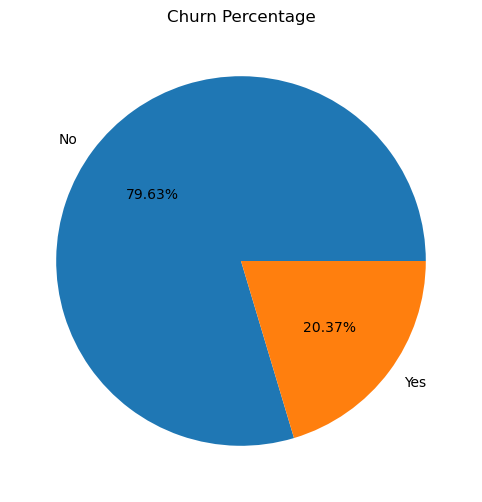

In [13]:
plt.figure(figsize=(10,6))
plt.pie(data['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

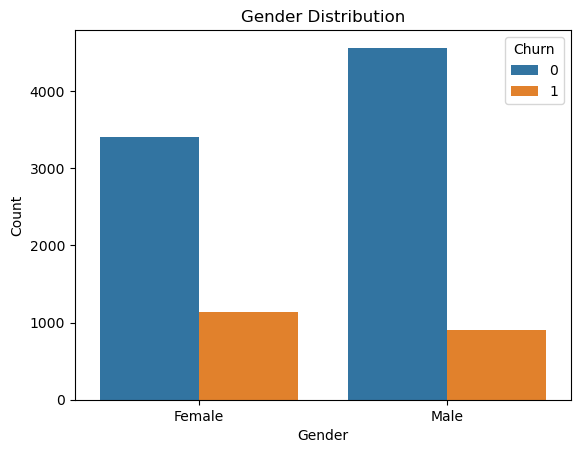

In [14]:
sns.countplot(x = 'Gender', data = data, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

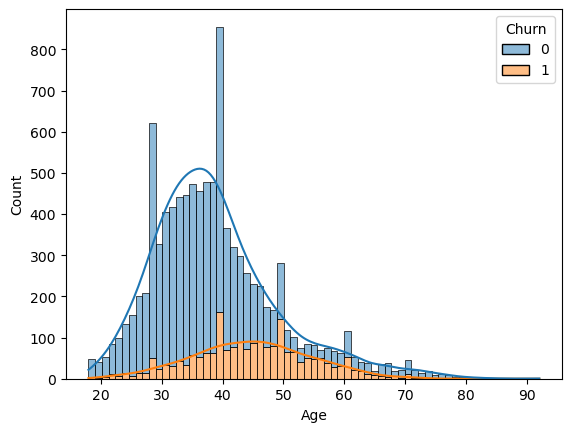

In [15]:
sns.histplot(data=data, x="Age", hue="Churn", multiple="stack",kde=True)

<AxesSubplot:xlabel='Churn', ylabel='CreditScore'>

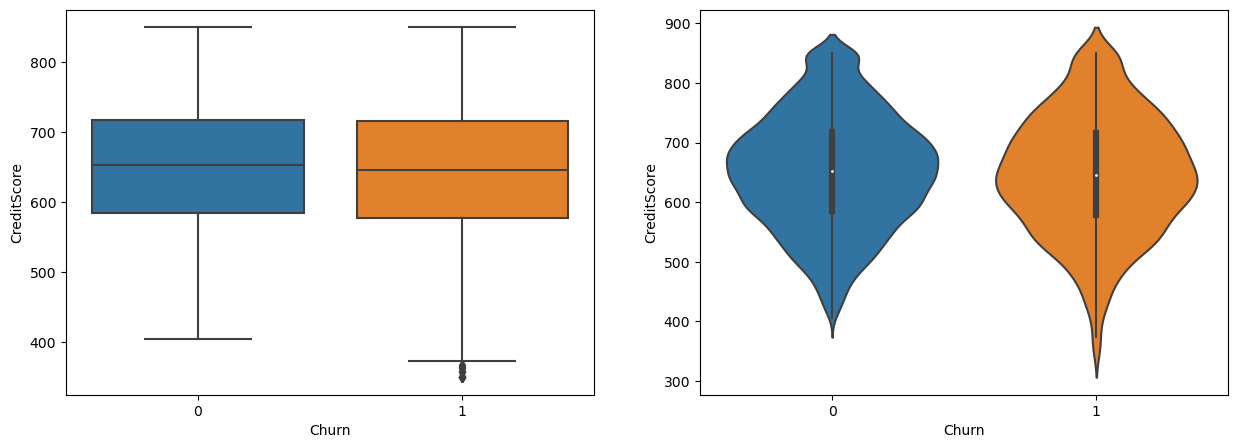

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=data, ax=ax[0])
sns.violinplot(x="Churn", y="CreditScore", data=data, ax=ax[1])

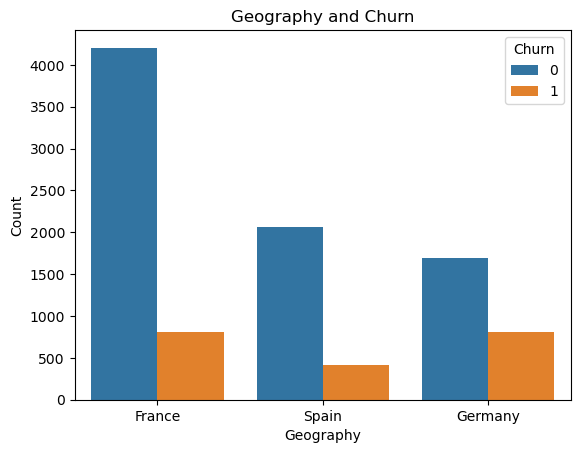

In [17]:
sns.countplot(x = 'Geography', hue = 'Churn', data = data)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Tenure', ylabel='count'>

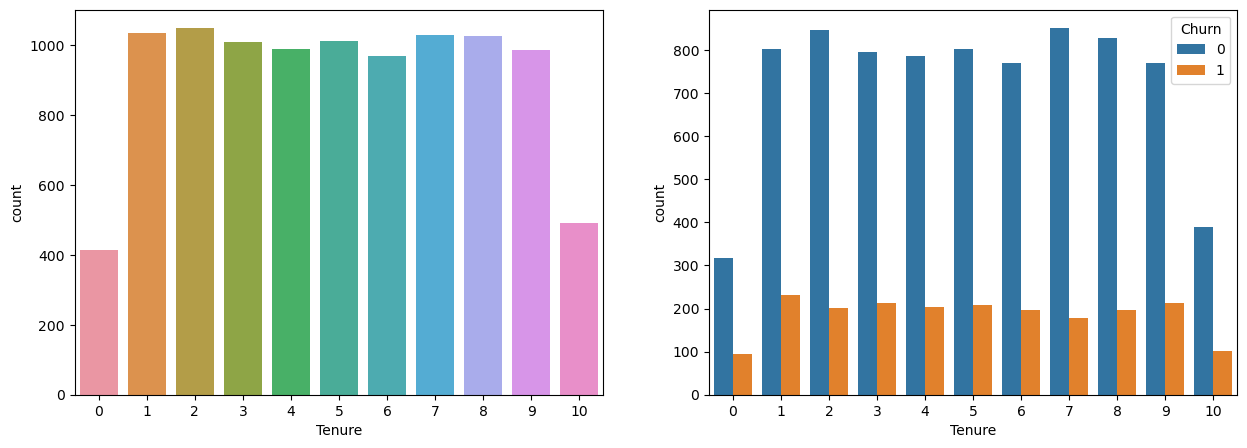

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=data,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=data,ax=ax[1])

<AxesSubplot:xlabel='Balance', ylabel='Count'>

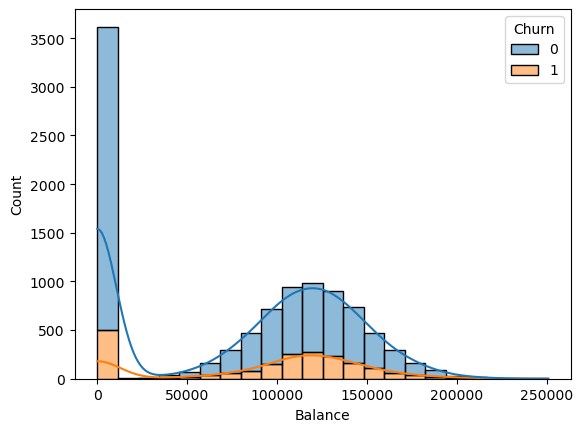

In [19]:
sns.histplot(data=data, x="Balance", hue="Churn", multiple="stack",kde=True)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

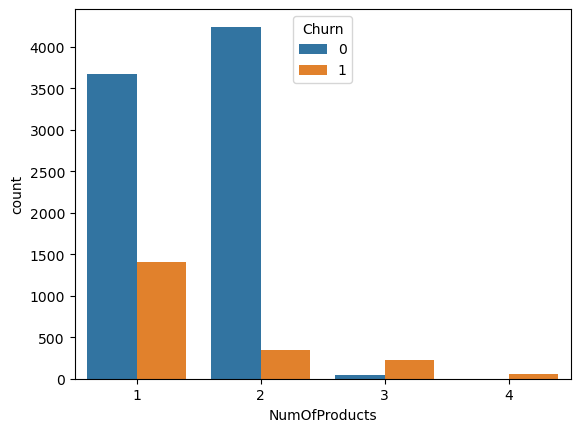

In [20]:
sns.countplot(x='NumOfProducts', hue='Churn', data=data)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

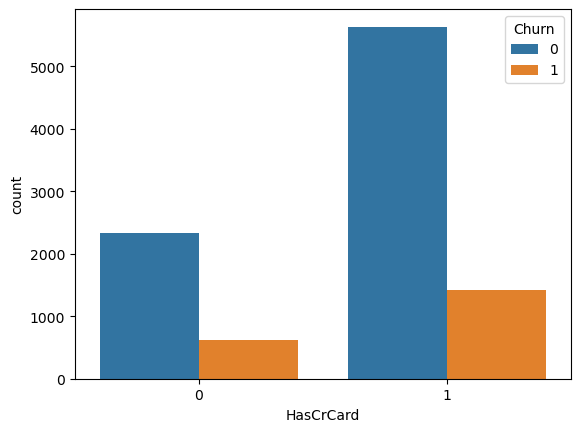

In [21]:
sns.countplot(x=data['HasCrCard'],hue=data['Churn'])

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

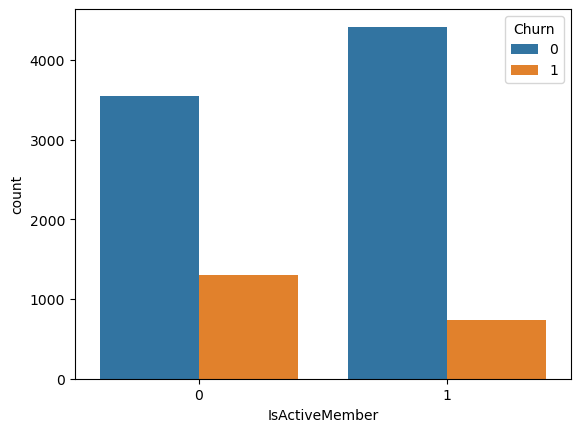

In [22]:
sns.countplot(x='IsActiveMember', hue='Churn', data=data)

In [23]:
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
 le.fit(data[i].unique())
 data[i]=le.transform(data[i])
 print(i,data[i].unique())

Geography [0 2 1]
Gender [0 1]


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(data[['CreditScore','Balance','EstimatedSalary']])

In [25]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,4,15701354,Boni,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0
5,6,15574012,Chu,-0.057205,2,1,44,8,0.597329,2,1,0,0.863650,1
6,7,15592531,Bartlett,1.774174,0,1,50,7,-1.225848,2,1,1,-1.565487,0
7,8,15656148,Obinna,-2.840488,1,0,29,4,0.618019,4,1,0,0.334854,1
8,9,15792365,He,-1.547141,0,1,44,4,1.050820,2,0,1,-0.437329,0
9,10,15592389,H?,0.346319,0,1,27,2,0.931463,1,1,1,-0.493230,0


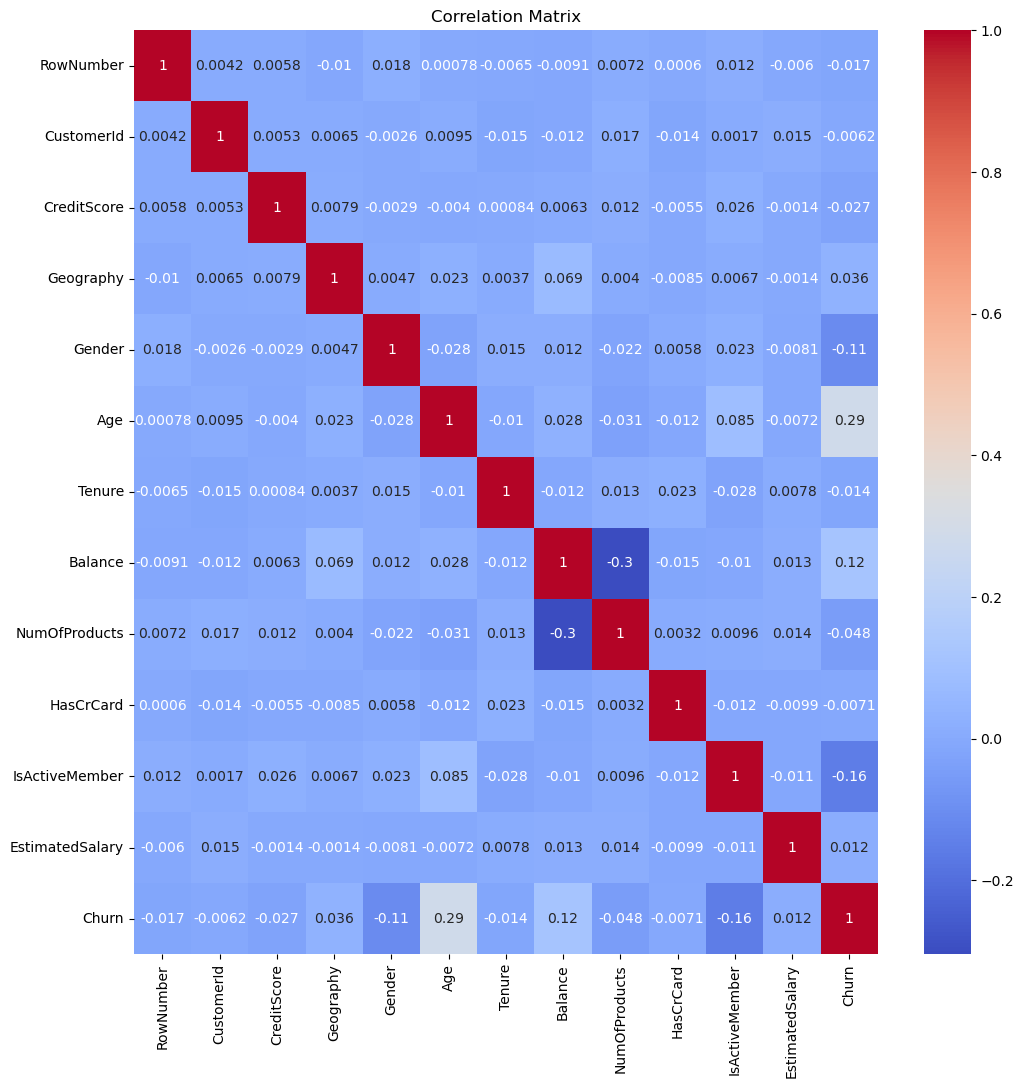

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
data_train = data.sample(frac=0.8,random_state=200)
data_test = data.drop(data_train.index)
print(len(data_train))
print(len(data_test))

8000
2000
